In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from matplotlib import ticker
from datetime import date

In [2]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/estimativa_dou_2020.xls?raw=true")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


In [3]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável (habitantes)

1	 São Paulo	46 649 132	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 411 923	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 463 349	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 985 284	7,1%	 Chade (14 037 000)
5	 Paraná	11 597 484	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 466 630	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 674 793	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 240 580	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 777 124	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 338 473	3,4%	 Sérvia (7 114 393)
11	 Goiás	7 206 589	3,4%	 Paraguai (7 003 406)
12	 Maranhão	7 153 262	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 269 995	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 108 508	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 059 905	1,9%	 Líbano (4 168 000)
16	 Mato Grosso	3 567 234	1,7%	 Uruguai (3 415 866)
17	 Rio Grande do Norte	3 560 903	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 365 351	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 289 290	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 094 325	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 839 188	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 338 474	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 815 278	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 607 363	0,7%	 Bahrein (1 359 800)
25	 Acre	906 876	0,4%	 Fiji (859 178)
26	 Amapá	877 613	0,4%	 Fiji (859 178)
27	 Roraima	652 713	0,3%	 Luxemburgo (562 958)"""

# fonte https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1
# fonte indireta IBGE

In [4]:
dados_da_populacao_io = StringIO(dados_da_populacao)
populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 649 132,"21,9%",Flag of Spain.svg Espanha (46 439 864)
1,2,Minas Gerais,21 411 923,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 463 349,"8,2%",Países Baixos (16 922 900)
3,4,Bahia Bahia,14 985 284,"7,1%",Chade (14 037 000)
4,5,Paraná,11 597 484,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 466 630,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 674 793,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 240 580,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará Pará,8 777 124,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 338 473,"3,4%",Sérvia (7 114 393)


In [5]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Posição                       27 non-null     int64 
 1   Unidade federativa            27 non-null     object
 2   População                     27 non-null     object
 3   % da pop. total               27 non-null     object
 4   País comparável (habitantes)  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [6]:
populacao = populacao.dropna()

In [7]:
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 649 132,"21,9%",Flag of Spain.svg Espanha (46 439 864)
1,2,Minas Gerais,21 411 923,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 463 349,"8,2%",Países Baixos (16 922 900)
3,4,Bahia Bahia,14 985 284,"7,1%",Chade (14 037 000)
4,5,Paraná,11 597 484,"5,4%",Bolívia (11 410 651)


# Desafio: pesquisar a documentação da StringIO (e IO)

# Desafio: limpar o excel do IBGE com nomes de colunas apropriados e linhas somente representando as unidades federativas.

# Desafio opcional: ler diretamente da wikipedia a versão html.

In [8]:
populacao.columns = ["posicao", "uf", "populacao", "porcentagem", "pais_comparavel"]
populacao["populacao"] = populacao["populacao"].str.replace(" ", "").astype(int)
populacao = populacao[["uf", "populacao"]]
populacao.head()

,uf,populacao
0,São Paulo,46649132
1,Minas Gerais,21411923
2,Rio de Janeiro,17463349
3,Bahia Bahia,14985284
4,Paraná,11597484


In [9]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uf         27 non-null     object
 1   populacao  27 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 456.0+ bytes


In [10]:
populacao.describe()

,populacao
count,2.700000e+01
mean,7.900653e+06
std,9.380644e+06
min,6.527130e+05
25%,2.966756e+06
50%,4.108508e+06
75%,9.457686e+06
max,4.664913e+07


# Desafio: estudar o read_table.

# Desafio: quais são os dtypes que o pandas possui.

# Desafio: explorar str do pandas.

In [3]:
# Dados da matéria anterior
dataset = pl.read_csv(
    '../../Data/Visualizacao Dados/Fase 1/A150850189_28_143_208.csv',
    separator=';',
    encoding='ISO-8859-1',
    skip_rows=3,
    has_header= True).with_columns(pl.all().str.replace(",", ".")).with_columns(pl.all().str.replace("-", "NaN"))
dados = pd.DataFrame(dataset, columns=dataset.columns)
dados.drop([27], inplace=True)
dados.drop([28], inplace=True)
dados.drop([29], inplace=True)
dados.drop([30], inplace=True)
dados.drop([31], inplace=True)
dados.drop([32], inplace=True)
dados.drop([33], inplace=True)
dados.drop([34], inplace=True)
dados_v1 = dados.drop("Unidade da Federação", axis=1)
dados_v1 = dados_v1.astype(float)
colunas_usaveis = dados_v1.mean().index.tolist()
dados_usaveis = dados_v1[colunas_usaveis]
dados_usaveis["Unidade da Federação"] = dados["Unidade da Federação"]
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis["Total"] = dados_usaveis.sum(axis = 1)
ordenados_por_total = dados_usaveis.sort_values(by="Total", ascending=False)
ordenados_por_total = ordenados_por_total.drop("Total", axis=1)
ordenados_por_total = ordenados_por_total / 1_000_000
mes_mais_recente = ordenados_por_total.columns[-1]
gastos_do_mais_recente = ordenados_por_total[mes_mais_recente]

In [12]:
display(gastos_do_mais_recente.head().round(2))
display(populacao.head())

Unidade da Federação
35 São Paulo            130.54
31 Minas Gerais          60.01
41 Paraná                32.66
43 Rio Grande do Sul     25.20
33 Rio de Janeiro        43.13
Name: 2021/Set, dtype: float64

,uf,populacao
0,São Paulo,46649132
1,Minas Gerais,21411923
2,Rio de Janeiro,17463349
3,Bahia Bahia,14985284
4,Paraná,11597484


In [13]:
populacao = populacao.set_index("uf")
populacao.head()

,populacao
uf,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia Bahia,14985284
Paraná,11597484


In [14]:
populacao.index = populacao.index.str.strip()
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Mato Grosso', 'Rio Grande do Norte', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [15]:
gastos_do_mais_recente.index

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '29 Bahia', '26 Pernambuco', '42 Santa Catarina',
       '23 Ceará', '52 Goiás', '15 Pará', '21 Maranhão', '32 Espírito Santo',
       '24 Rio Grande do Norte', '25 Paraíba', '53 Distrito Federal',
       '50 Mato Grosso do Sul', '22 Piauí', '27 Alagoas', '51 Mato Grosso',
       '13 Amazonas', '28 Sergipe', '17 Tocantins', '11 Rondônia', '12 Acre',
       '14 Roraima', '16 Amapá'],
      dtype='object', name='Unidade da Federação')

In [16]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo            130.535318
Minas Gerais          60.010941
Paraná                32.660877
Rio Grande do Sul     25.200346
Rio de Janeiro        43.133058
Name: 2021/Set, dtype: float64

In [17]:
for estado in gastos_do_mais_recente.index:
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Mato Grosso', 'Rio Grande do Norte', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [18]:
gastos_e_populacao = populacao.join(gastos_do_mais_recente)
gastos_e_populacao.head()

,populacao,2021/Set
uf,,
São Paulo,46649132,130.535318
Minas Gerais,21411923,60.010941
Rio de Janeiro,17463349,43.133058
Bahia,14985284,24.858284
Paraná,11597484,32.660877


# Desafio opcional: é possível fazer o processo de outra forma sem utilizar a palavra for?

<Axes: xlabel='uf'>

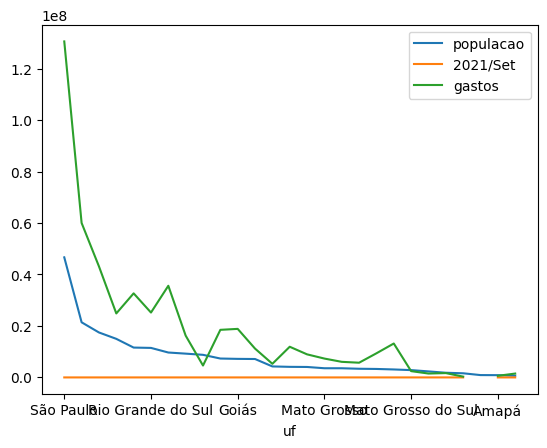

In [19]:
ultima_coluna = gastos_e_populacao.columns[-1]
gastos_e_populacao["gastos"] = gastos_e_populacao[ultima_coluna] * 1_000_000
gastos_e_populacao.plot()

In [20]:
gastos_e_populacao.loc[["Ceará", "Pará"]]

,populacao,2021/Set,gastos
uf,,,
Ceará,9240580,16.234604,16234603.93
Pará,8777124,4.620263,4620263.03


In [21]:
gastos_e_populacao["gasto_por_habitante"] = gastos_e_populacao["gastos"] / gastos_e_populacao["populacao"]
gastos_e_populacao.head()

,populacao,2021/Set,gastos,gasto_por_habitante
uf,,,,
São Paulo,46649132,130.535318,1.305353e+08,2.798237
Minas Gerais,21411923,60.010941,6.001094e+07,2.802688
Rio de Janeiro,17463349,43.133058,4.313306e+07,2.469919
Bahia,14985284,24.858284,2.485828e+07,1.658846
Paraná,11597484,32.660877,3.266088e+07,2.816204


<Axes: xlabel='uf'>

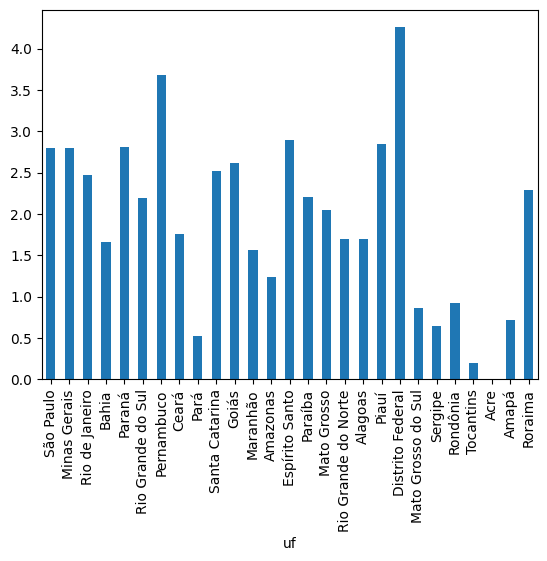

In [22]:
gastos_e_populacao["gasto_por_habitante"].plot(kind="bar")

# Desafio: deixar o gráfico mais arrumadinho com legenda adequada, títulos, eixos e ordenar do maior gasto por habitante para menor.

# Desafio: colocar a média dos gastos como uma linha horizontal.

# Desafio: ordenar por número de habitantes.

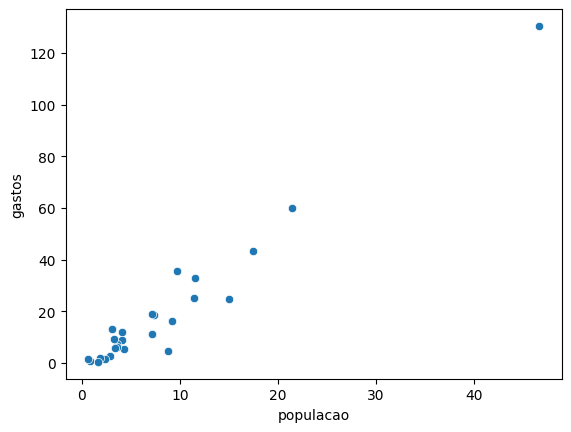

In [23]:
ax = sns.scatterplot(data = gastos_e_populacao / 1_000_000, x="populacao", y="gastos")
ax = ax

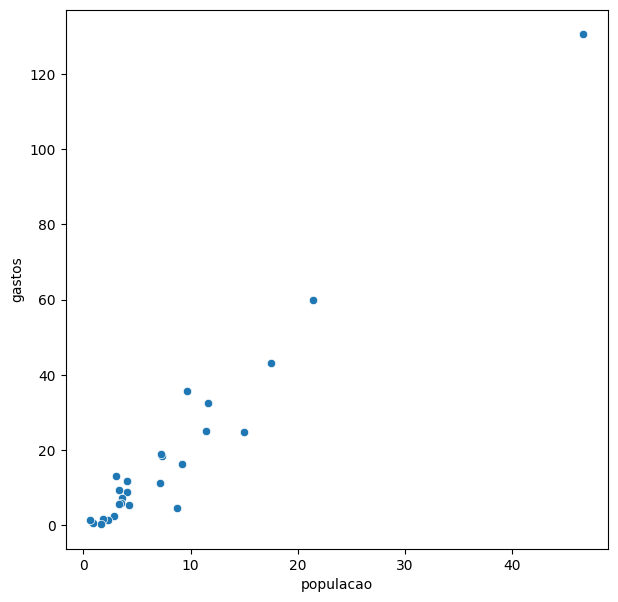

In [24]:
plt.figure(figsize=(7,7))
ax = sns.scatterplot(data = gastos_e_populacao / 1_000_000, x="populacao", y="gastos")
ax = ax

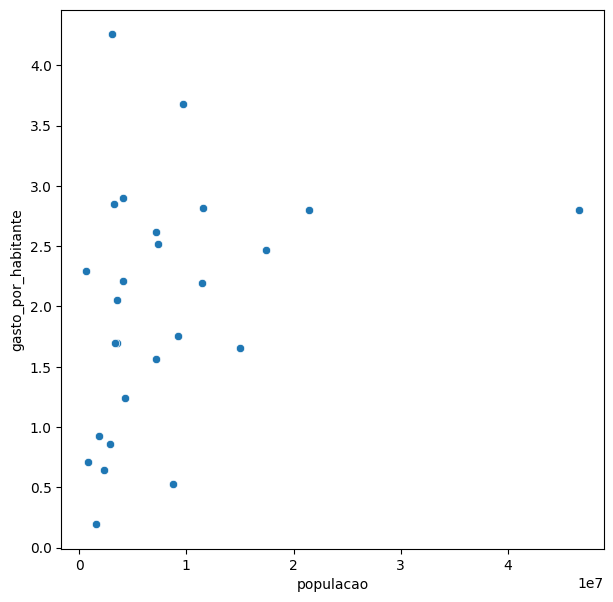

In [25]:
plt.figure(figsize=(7,7))
ax = sns.scatterplot(data = gastos_e_populacao, x="populacao", y="gasto_por_habitante")
ax = ax

# Desafio: melhorar todos os gráficos. Já tem nomes nos eixo x e y mas tem muito o que melhorar.

# Desafio: executar o mesmo gráfico para o penúltimo mês.

# Desafio: plote o gráfico de gasto por população para os dois meses simultâneamente. Diferenciando os pontos com uma tonalidade de cor diferente para cada mês.

In [26]:
ordenados_por_total.index = ordenados_por_total.index.str[3:].str.strip()
ordenados_por_total.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,0.040243,0.01145,0.034584,0.068557,0.039809,0.019905,0.019905,0.034532,0.023374,0.019905,...,338.634303,361.427088,352.846448,502.905608,504.427182,548.112706,503.160960,404.373176,301.986342,130.535318
Minas Gerais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181.833354,192.844182,183.891512,261.376727,255.545758,275.151838,249.713867,194.734137,139.157824,60.010941
Paraná,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.212816,130.532845,134.077151,172.636232,174.040313,191.861617,163.580936,119.408027,91.187723,32.660877
Rio Grande do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.291289,115.991861,126.730285,169.687680,145.302546,155.084262,142.812284,112.805352,74.954590,25.200346
Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.752690,103.468411,87.518761,125.735136,132.965058,145.372684,124.909044,113.660882,94.137361,43.133058


In [27]:
def insere_gastos_e_gasto_por_habitante(ordenados_por_total, gastos_e_populacao, mes):
  gastos = ordenados_por_total[mes]
  gastos_e_populacao[f"gastos_{mes}"] = gastos * 1_000_000
  gastos_e_populacao[f"gasto_por_habitante_{mes}"] = gastos_e_populacao[f"gastos_{mes}"] / gastos_e_populacao["populacao"]
  return gastos_e_populacao

In [28]:
gastos_e_populacao = insere_gastos_e_gasto_por_habitante(ordenados_por_total, gastos_e_populacao, ordenados_por_total.columns[-1])
gastos_e_populacao.head()

,populacao,2021/Set,gastos,gasto_por_habitante,gastos_2021/Set,gasto_por_habitante_2021/Set
uf,,,,,,
São Paulo,46649132,130.535318,1.305353e+08,2.798237,1.305353e+08,2.798237
Minas Gerais,21411923,60.010941,6.001094e+07,2.802688,6.001094e+07,2.802688
Rio de Janeiro,17463349,43.133058,4.313306e+07,2.469919,4.313306e+07,2.469919
Bahia,14985284,24.858284,2.485828e+07,1.658846,2.485828e+07,1.658846
Paraná,11597484,32.660877,3.266088e+07,2.816204,3.266088e+07,2.816204


In [29]:
gastos_e_populacao = insere_gastos_e_gasto_por_habitante(ordenados_por_total, gastos_e_populacao, ordenados_por_total.columns[-2])
gastos_e_populacao = insere_gastos_e_gasto_por_habitante(ordenados_por_total, gastos_e_populacao, ordenados_por_total.columns[-3])
gastos_e_populacao.head()

,populacao,2021/Set,gastos,gasto_por_habitante,gastos_2021/Set,gasto_por_habitante_2021/Set,gastos_2021/Ago,gasto_por_habitante_2021/Ago,gastos_2021/Jul,gasto_por_habitante_2021/Jul
uf,,,,,,,,,,
São Paulo,46649132,130.535318,1.305353e+08,2.798237,1.305353e+08,2.798237,3.019863e+08,6.473568,4.043732e+08,8.668397
Minas Gerais,21411923,60.010941,6.001094e+07,2.802688,6.001094e+07,2.802688,1.391578e+08,6.499081,1.947341e+08,9.094659
Rio de Janeiro,17463349,43.133058,4.313306e+07,2.469919,4.313306e+07,2.469919,9.413736e+07,5.390567,1.136609e+08,6.508539
Bahia,14985284,24.858284,2.485828e+07,1.658846,2.485828e+07,1.658846,6.164569e+07,4.113748,9.569190e+07,6.385725
Paraná,11597484,32.660877,3.266088e+07,2.816204,3.266088e+07,2.816204,9.118772e+07,7.862716,1.194080e+08,10.296029


<Axes: xlabel='populacao', ylabel='gastos_2021/Jul'>

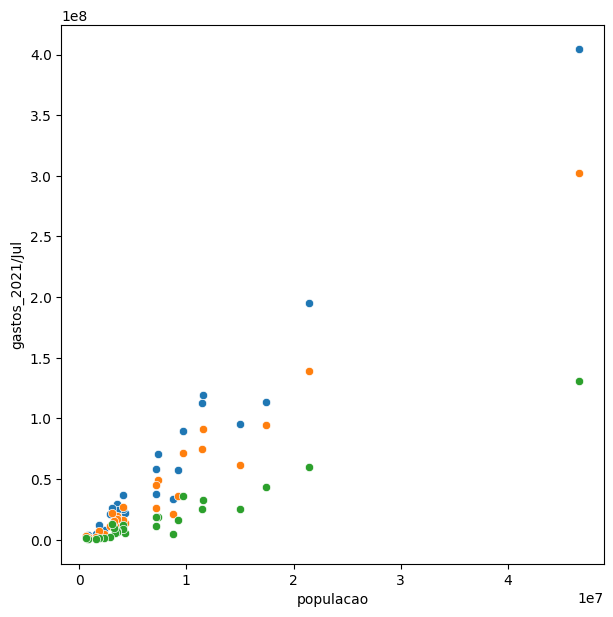

In [30]:
plt.figure(figsize=(7,7))
sns.scatterplot(data = gastos_e_populacao, x = "populacao", y ="gastos_2021/Jul")
sns.scatterplot(data = gastos_e_populacao, x = "populacao", y ="gastos_2021/Ago")
sns.scatterplot(data = gastos_e_populacao, x = "populacao", y ="gastos_2021/Set")

# Desafio: legenda, diminuir marcações e arrumar o gráfico.

# Desafio: explorem esse gráfico e levantem alguma hipótese ou questão.

# Desafio: comparar os últimos 12 meses com os 12 meses anteriores. Somar os 12 últimos meses em uma única coluna.

In [31]:
# gastos_do_mais_recente.drop(index=gastos_do_mais_recente.index[], axis=0, inplace=True)
ordenados_por_total.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,0.040243,0.01145,0.034584,0.068557,0.039809,0.019905,0.019905,0.034532,0.023374,0.019905,...,338.634303,361.427088,352.846448,502.905608,504.427182,548.112706,503.160960,404.373176,301.986342,130.535318
Minas Gerais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181.833354,192.844182,183.891512,261.376727,255.545758,275.151838,249.713867,194.734137,139.157824,60.010941
Paraná,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.212816,130.532845,134.077151,172.636232,174.040313,191.861617,163.580936,119.408027,91.187723,32.660877
Rio Grande do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.291289,115.991861,126.730285,169.687680,145.302546,155.084262,142.812284,112.805352,74.954590,25.200346
Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.752690,103.468411,87.518761,125.735136,132.965058,145.372684,124.909044,113.660882,94.137361,43.133058


In [32]:
ordenados_por_total.columns

Index(['1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez', '1994/Jan', '1994/Fev',
       '1994/Mai', '1994/Ago', '1994/Nov', '1995/Jan',
       ...
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr', '2021/Mai',
       '2021/Jun', '2021/Jul', '2021/Ago', '2021/Set'],
      dtype='object', length=291)

In [33]:
ordenados_por_total.loc["São Paulo"]

1992/Mar      0.040243
1992/Abr      0.011450
1993/Mai      0.034584
1993/Dez      0.068557
1994/Jan      0.039809
               ...    
2021/Mai    548.112706
2021/Jun    503.160960
2021/Jul    404.373176
2021/Ago    301.986342
2021/Set    130.535318
Name: São Paulo, Length: 291, dtype: float64

<Axes: ylabel='São Paulo'>

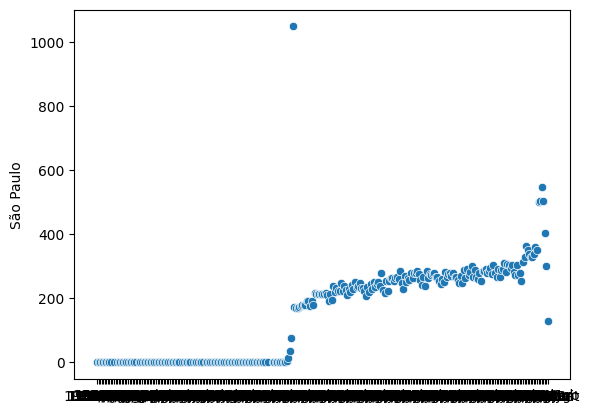

In [34]:
sns.scatterplot(x=ordenados_por_total.columns, y=ordenados_por_total.loc["São Paulo"])

In [35]:
mensal = ordenados_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
1992/Mar,0.040243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992/Abr,0.011450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993/Mai,0.034584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993/Dez,0.068557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994/Jan,0.039809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='São Paulo'>

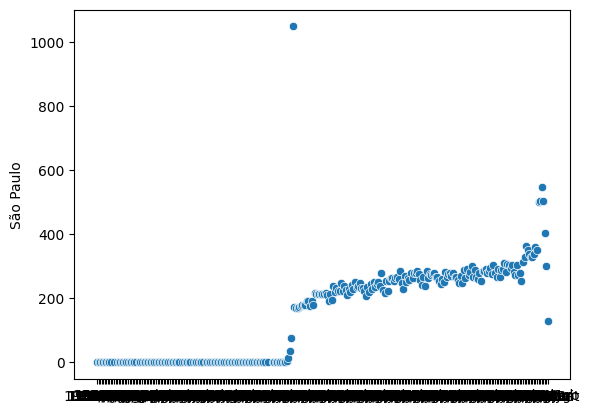

In [36]:
sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")

# Desafio: fazer o gráfico com dois estados, uma cor diferente para cada estado.

<Axes: ylabel='São Paulo'>

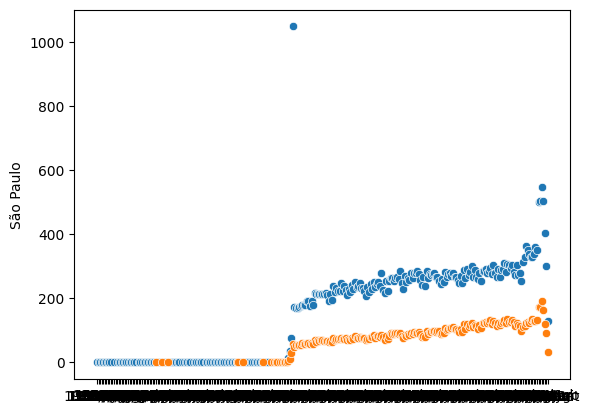

In [37]:
sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")
sns.scatterplot(data=mensal, x=mensal.index, y="Paraná")

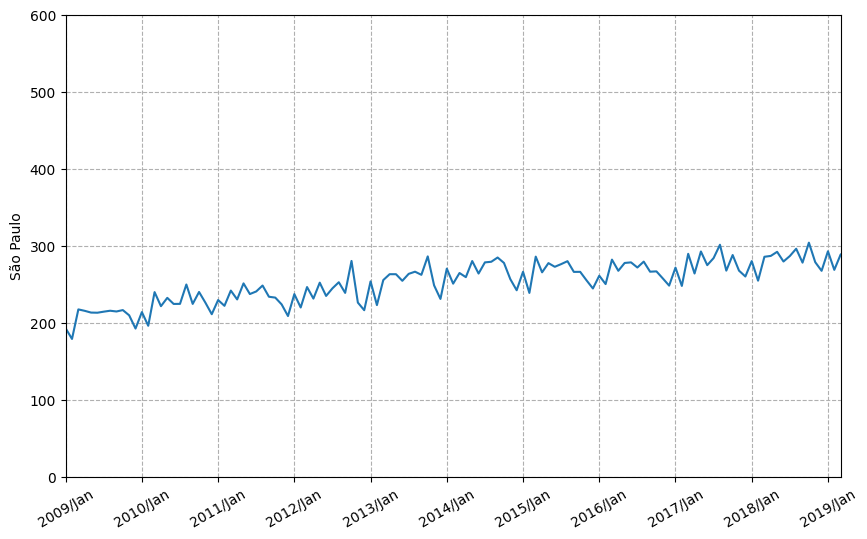

In [38]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 600)
axis.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=138))
plt.xlim(138, 260)
plt.grid(linestyle="--")
plt.show()

# Desafio: no gráfico acima utilizar um valor máximo do eixo y que caiba todos os valores da nossa série. Além disso precisa de um "respiro" (white space).

# Desafio: parece que fevereiro o valor sempre cai, é isso mesmo? Qual seria um possível motivo?

# Desafio: colocar um minor locator no mês de julho.

In [39]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 1992/Mar to 2021/Set
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            282 non-null    float64
 1   Minas Gerais         190 non-null    float64
 2   Paraná               184 non-null    float64
 3   Rio Grande do Sul    178 non-null    float64
 4   Rio de Janeiro       195 non-null    float64
 5   Bahia                180 non-null    float64
 6   Pernambuco           185 non-null    float64
 7   Santa Catarina       175 non-null    float64
 8   Ceará                177 non-null    float64
 9   Goiás                184 non-null    float64
 10  Pará                 176 non-null    float64
 11  Maranhão             179 non-null    float64
 12  Espírito Santo       176 non-null    float64
 13  Rio Grande do Norte  176 non-null    float64
 14  Paraíba              182 non-null    float64
 15  Distrito Federal     176 non-null

In [40]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 1992/Mar to 2021/Set
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            282 non-null    float64
 1   Minas Gerais         190 non-null    float64
 2   Paraná               184 non-null    float64
 3   Rio Grande do Sul    178 non-null    float64
 4   Rio de Janeiro       195 non-null    float64
 5   Bahia                180 non-null    float64
 6   Pernambuco           185 non-null    float64
 7   Santa Catarina       175 non-null    float64
 8   Ceará                177 non-null    float64
 9   Goiás                184 non-null    float64
 10  Pará                 176 non-null    float64
 11  Maranhão             179 non-null    float64
 12  Espírito Santo       176 non-null    float64
 13  Rio Grande do Norte  176 non-null    float64
 14  Paraíba              182 non-null    float64
 15  Distrito Federal     176 non-null

In [41]:
mensal.index

Index(['1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez', '1994/Jan', '1994/Fev',
       '1994/Mai', '1994/Ago', '1994/Nov', '1995/Jan',
       ...
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr', '2021/Mai',
       '2021/Jun', '2021/Jul', '2021/Ago', '2021/Set'],
      dtype='object', length=291)

In [42]:
def f(x):
  print(f"valor: {x}")

# mensal.index.map(f)

In [43]:
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes_como_string: str = ano_mes[5:]
  mes: int = meses[mes_como_string]
  return date(ano, mes, 1)

In [44]:
mensal.index.map(para_dia)

Index([1992-03-01, 1992-04-01, 1993-05-01, 1993-12-01, 1994-01-01, 1994-02-01,
       1994-05-01, 1994-08-01, 1994-11-01, 1995-01-01,
       ...
       2020-12-01, 2021-01-01, 2021-02-01, 2021-03-01, 2021-04-01, 2021-05-01,
       2021-06-01, 2021-07-01, 2021-08-01, 2021-09-01],
      dtype='object', length=291)

In [45]:
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
1992-03-01,0.040243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-01,0.011450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-05-01,0.034584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-01,0.068557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01,0.039809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


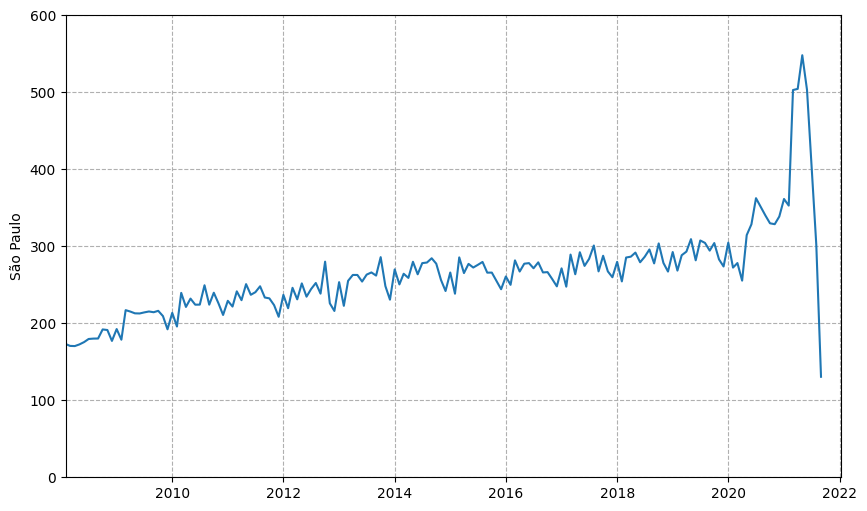

In [46]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.ylim(0, 600)
plt.grid(linestyle="--")
plt.xlim(13910, 19000)
plt.show()

In [47]:
mensal.index[0]

datetime.date(1992, 3, 1)

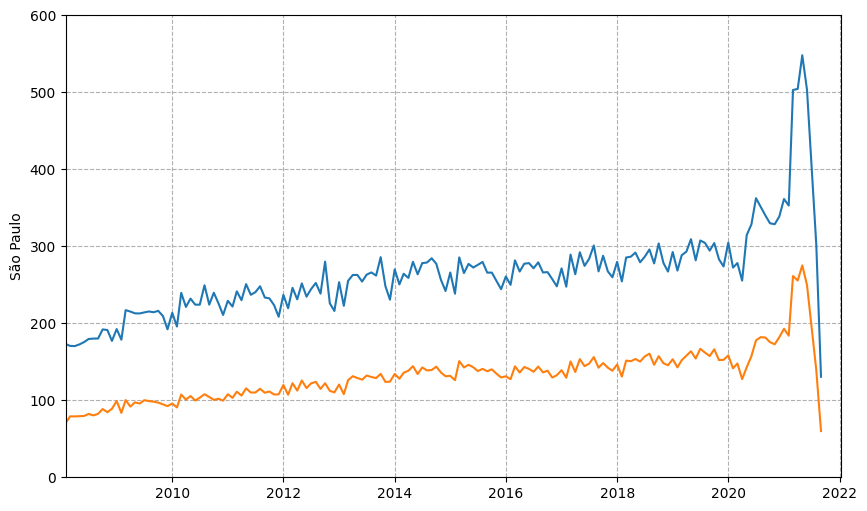

In [48]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
axis = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")
plt.ylim(0, 600)
plt.grid(linestyle="--")
plt.xlim(13910, 19000)
plt.show()

In [49]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
1992-03-01,0.040243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-01,0.011450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-05-01,0.034584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-01,0.068557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01,0.039809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns) # type: ignore
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,1992-03-01,São Paulo,0.040243
1,1992-04-01,São Paulo,0.011450
2,1993-05-01,São Paulo,0.034584
3,1993-12-01,São Paulo,0.068557
4,1994-01-01,São Paulo,0.039809


# Desafio opcional: como criar uma tabela equivalente ao `mensal` baseada no `mensal_aberto`

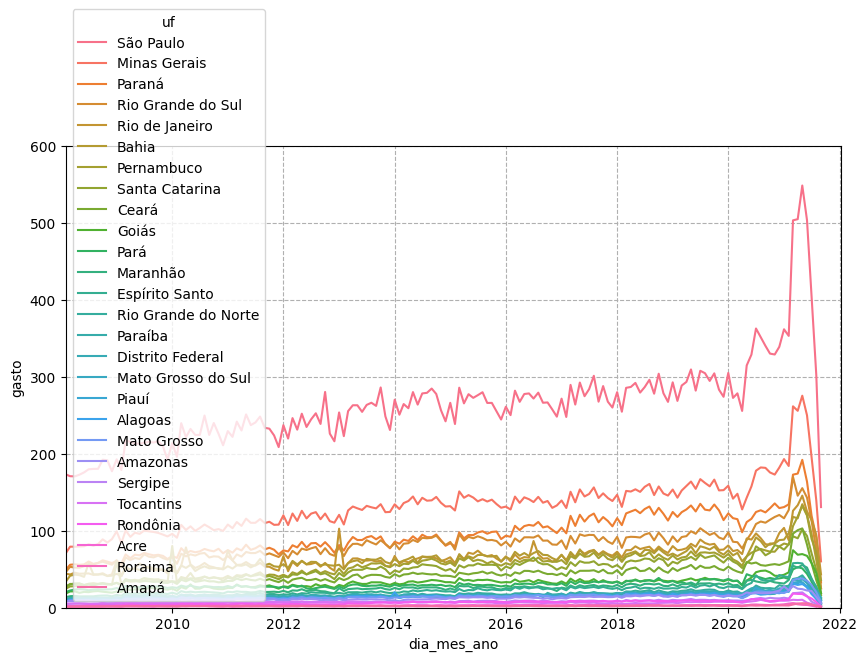

In [51]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto, x="dia_mes_ano", y="gasto", hue="uf")
plt.ylim(0, 600)
plt.grid(linestyle="--")
plt.xlim(13910, 19000)
plt.show()

# Desafio: plotar o mesmo gráfico, porém com somente 2 estados que você escolherá.

# Desafio: escolher uma paleta de cores adequada, de tamanho adequado (pelo menos 27 cores).

# Desafio: formatar legenda e eixos.

# Desafio: como configurar o grid com o seaborn?

In [52]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,1992-03-01,São Paulo,0.040243
1,1992-04-01,São Paulo,0.011450
2,1993-05-01,São Paulo,0.034584
3,1993-12-01,São Paulo,0.068557
4,1994-01-01,São Paulo,0.039809


In [53]:
mensal_aberto["dia_mes_ano"][0]

datetime.date(1992, 3, 1)

In [54]:
mensal_aberto["dia_mes_ano"][0].year

1992

In [55]:
mensal_aberto.shape

(7857, 3)

In [56]:
mensal_aberto["dia_mes_ano"].astype("datetime64[ns]")

0      1992-03-01
1      1992-04-01
2      1993-05-01
3      1993-12-01
4      1994-01-01
          ...    
7852   2021-05-01
7853   2021-06-01
7854   2021-07-01
7855   2021-08-01
7856   2021-09-01
Name: dia_mes_ano, Length: 7857, dtype: datetime64[ns]

In [57]:
mensal_aberto["dia_mes_ano"] = pd.to_datetime(mensal_aberto["dia_mes_ano"])

In [58]:
mensal_aberto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dia_mes_ano  7857 non-null   datetime64[ns]
 1   uf           7857 non-null   object        
 2   gasto        4901 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 184.3+ KB


In [59]:
mensal_aberto["dia_mes_ano"].dt.year

0       1992
1       1992
2       1993
3       1993
4       1994
        ... 
7852    2021
7853    2021
7854    2021
7855    2021
7856    2021
Name: dia_mes_ano, Length: 7857, dtype: int32

In [60]:
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto.head()

,dia_mes_ano,uf,gasto,ano,mes
0,1992-03-01,São Paulo,0.040243,1992,3
1,1992-04-01,São Paulo,0.011450,1992,4
2,1993-05-01,São Paulo,0.034584,1993,5
3,1993-12-01,São Paulo,0.068557,1993,12
4,1994-01-01,São Paulo,0.039809,1994,1


In [61]:
mensal_aberto.query("uf=='São Paulo'")

,dia_mes_ano,uf,gasto,ano,mes
0,1992-03-01,São Paulo,0.040243,1992,3
1,1992-04-01,São Paulo,0.011450,1992,4
2,1993-05-01,São Paulo,0.034584,1993,5
3,1993-12-01,São Paulo,0.068557,1993,12
4,1994-01-01,São Paulo,0.039809,1994,1
...,...,...,...,...,...
286,2021-05-01,São Paulo,548.112706,2021,5
287,2021-06-01,São Paulo,503.160960,2021,6
288,2021-07-01,São Paulo,404.373176,2021,7
289,2021-08-01,São Paulo,301.986342,2021,8


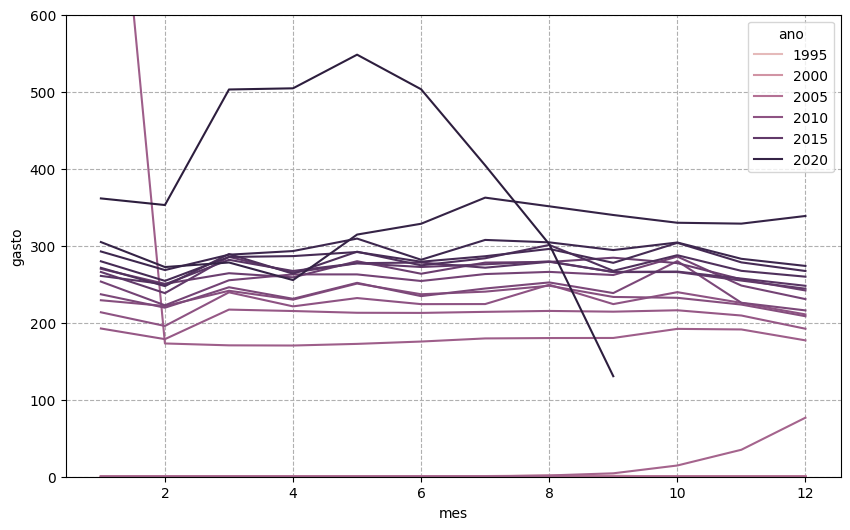

In [62]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto", hue="ano")
plt.ylim(0, 600)
plt.grid(linestyle="--")
plt.show()

# Desafio: cores (paleta de cores), labels, espaçamento dos ticks.

# Desafio: escolher um ano e plotar o mesmo ano para dois estados diferentes no mesmo gráfico. Usar estados de regiões diferentes do país. Comparar e tentar concluir algo.

# Desafio: nomes dos meses no eixo X.

In [63]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [64]:
mensal_aberto["gasto_diario"] = mensal_aberto["gasto"] / mensal_aberto["mes"].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,ano,mes,gasto_diario
0,1992-03-01,São Paulo,0.040243,1992,3,0.001298
1,1992-04-01,São Paulo,0.011450,1992,4,0.000382
2,1993-05-01,São Paulo,0.034584,1993,5,0.001116
3,1993-12-01,São Paulo,0.068557,1993,12,0.002212
4,1994-01-01,São Paulo,0.039809,1994,1,0.001284


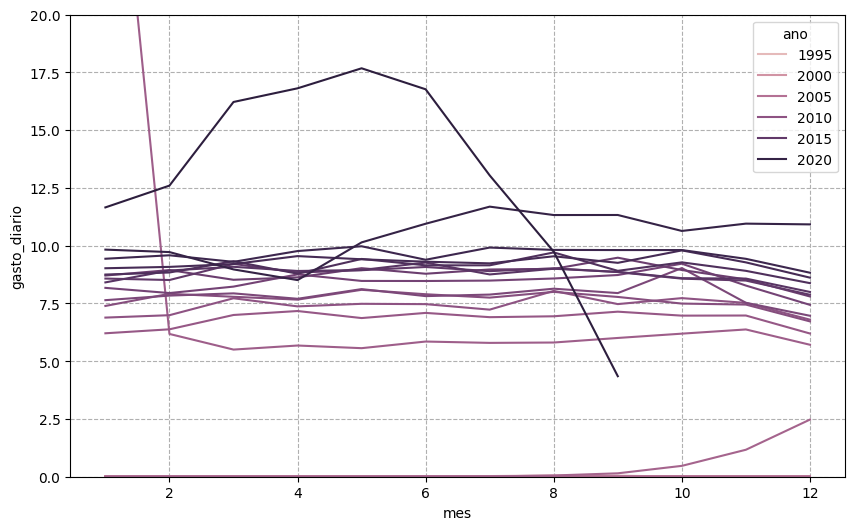

In [65]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto_diario", hue="ano")
plt.ylim(0, 20)
plt.grid(linestyle="--")
plt.show()

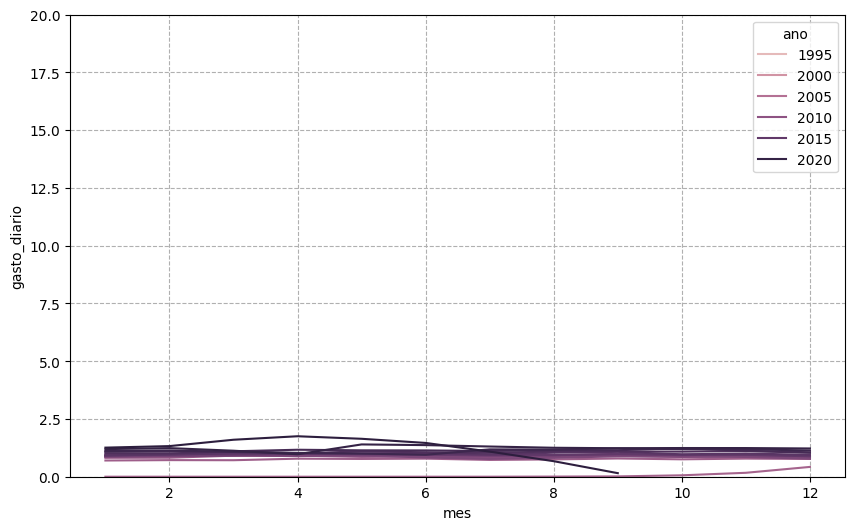

In [66]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto.query("uf=='Pará'"), x="mes", y="gasto_diario", hue="ano")
plt.ylim(0, 20)
plt.grid(linestyle="--")
plt.show()

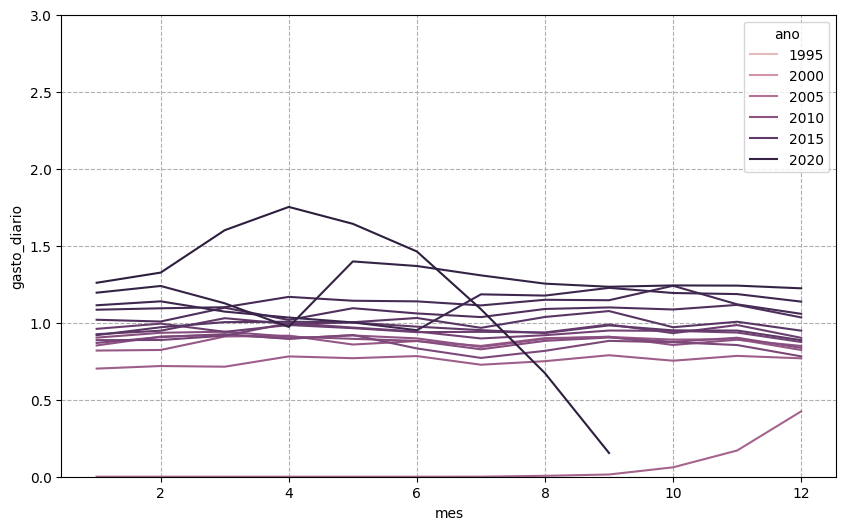

In [67]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto.query("uf=='Pará'"), x="mes", y="gasto_diario", hue="ano")
plt.ylim(0, 3)
plt.grid(linestyle="--")
plt.show()

# Desafio: um único gráfico com um único ano do Pará e São Paulo. Cuidado com cores.

# Desafio: escolha dois estados. Pegue a população desses dois estados nos últimos 12 meses e calcule o gasto por pessoa nesses estados. Faça o gráfico de linhas com uma linha para cada 12 meses desses estados com o seu gasto por pessoa.

In [93]:
mensal_do_meu_estado = mensal_aberto.query("uf=='São Paulo' and ano>=2008")
mensal_do_meu_estado.head()

,dia_mes_ano,uf,gasto,ano,mes,gasto_diario
126,2008-01-01,São Paulo,1049.827695,2008,1,33.865410
127,2008-02-01,São Paulo,173.062308,2008,2,6.180797
128,2008-03-01,São Paulo,170.621304,2008,3,5.503913
129,2008-04-01,São Paulo,170.389850,2008,4,5.679662
130,2008-05-01,São Paulo,172.513744,2008,5,5.564959


In [94]:
mensal_do_meu_estado.dropna()

,dia_mes_ano,uf,gasto,ano,mes,gasto_diario
126,2008-01-01,São Paulo,1049.827695,2008,1,33.865410
127,2008-02-01,São Paulo,173.062308,2008,2,6.180797
128,2008-03-01,São Paulo,170.621304,2008,3,5.503913
129,2008-04-01,São Paulo,170.389850,2008,4,5.679662
130,2008-05-01,São Paulo,172.513744,2008,5,5.564959
...,...,...,...,...,...,...
286,2021-05-01,São Paulo,548.112706,2021,5,17.681055
287,2021-06-01,São Paulo,503.160960,2021,6,16.772032
288,2021-07-01,São Paulo,404.373176,2021,7,13.044296
289,2021-08-01,São Paulo,301.986342,2021,8,9.741495


In [95]:
gastos_por_ano = mensal_do_meu_estado.dropna().drop(["dia_mes_ano", "uf"], axis=1).groupby("ano").sum()
gastos_por_ano.head()

,gasto,mes,gasto_diario
ano,,,
2008,3012.242696,78,98.538677
2009,2490.554913,78,81.873780
2010,2700.264068,78,88.744676
2011,2796.457163,78,91.968163
2012,2877.135505,78,94.569634


<Axes: ylabel='gasto'>

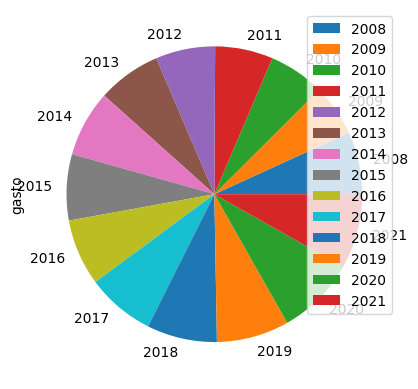

In [96]:
gastos_por_ano.plot(kind="pie", y="gasto")

<Axes: xlabel='ano', ylabel='gasto'>

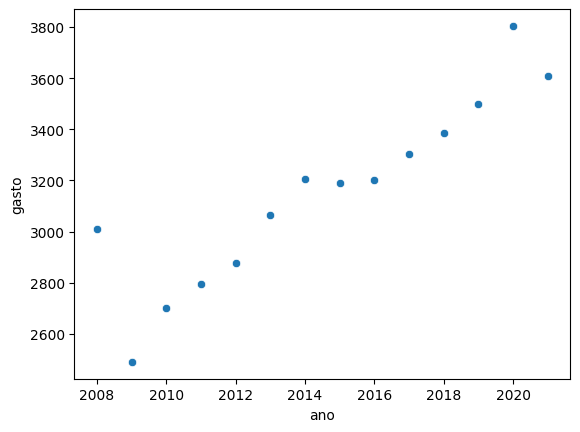

In [97]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")

<Axes: xlabel='ano', ylabel='gasto'>

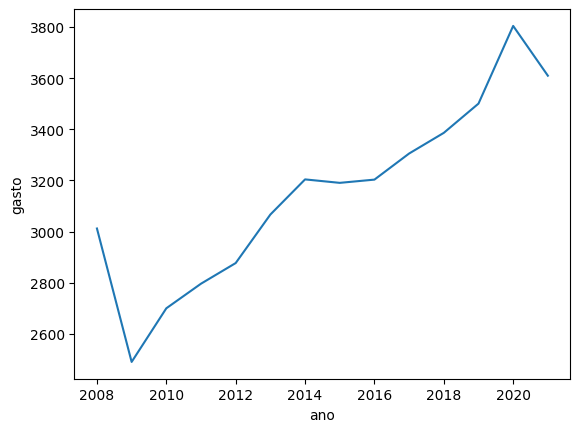

In [98]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")
# o lineplot é pior pois gera a sensação da existência de valores intermediários
# esse gráfico perde também a sazonalidade dentro de um ano

<Axes: xlabel='ano', ylabel='gasto'>

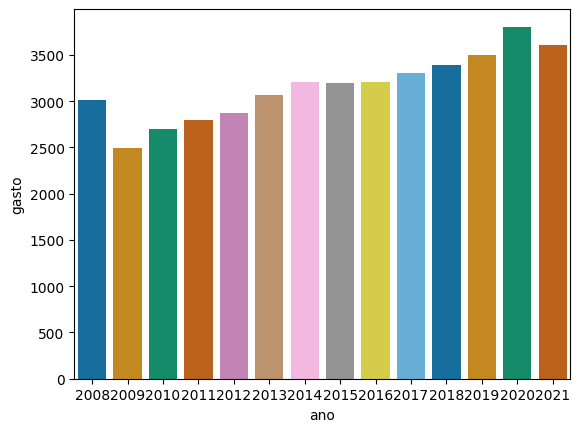

In [99]:
paleta = sns.color_palette("colorblind", 14)
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette = paleta)

<Axes: xlabel='ano', ylabel='gasto'>

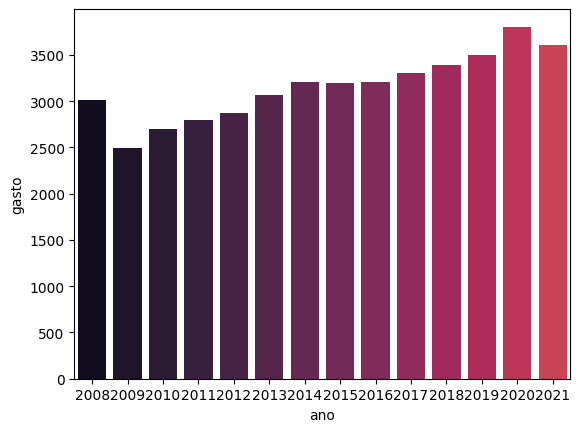

In [100]:
paleta = sns.color_palette("rocket", 24)
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette = paleta)

<Axes: xlabel='ano', ylabel='gasto'>

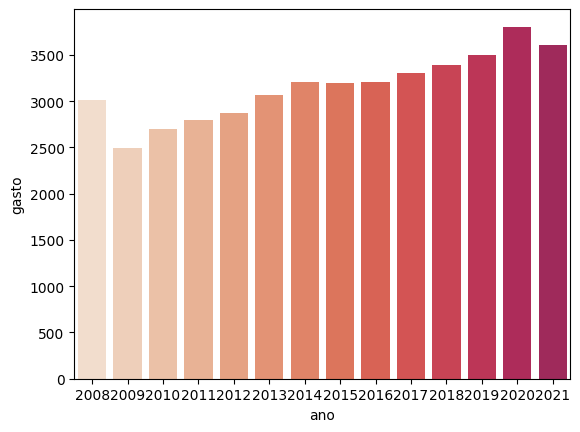

In [101]:
paleta = sns.color_palette("rocket_r", 24)
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette = paleta)

# Desafio: colocar a cor de acordo com um valor mais baixo ou mais alto, e não de acordo com esquerda e direita.

<Axes: xlabel='ano', ylabel='gasto'>

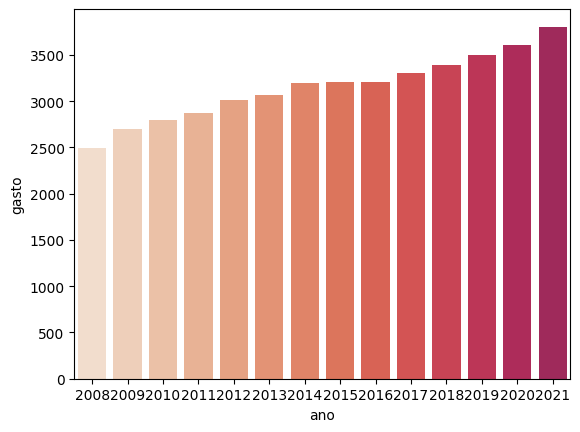

In [135]:
paleta = sns.color_palette("rocket_r", 24) # não é isso
df = gastos_por_ano.sort_values(by="gasto")
sns.barplot(data=df, x=gastos_por_ano.index, y="gasto", palette=paleta)

<Axes: xlabel='ano', ylabel='gasto'>

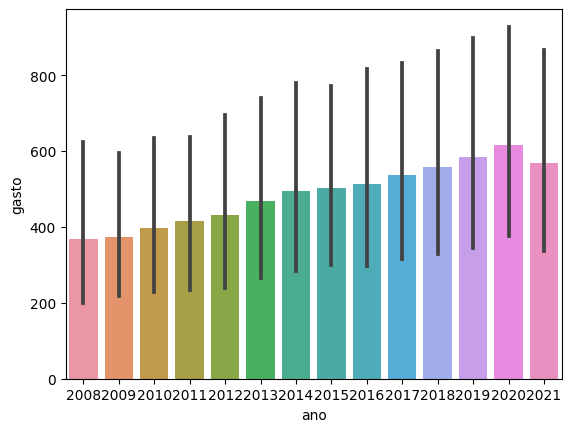

In [105]:
por_ano_de_todos = mensal_aberto.query("ano>=2008").dropna().drop("dia_mes_ano", axis=1).groupby(["ano", "uf"]).sum().reset_index()
sns.barplot(data=por_ano_de_todos, x="ano", y="gasto")
# esse intervalo de confiança não serve para nada
# pois pegamos todos os estados

In [119]:
estados = ["Amazonas", "Mato Grosso", "Ceará"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados and ano>=2008").dropna().drop("dia_mes_ano", axis=1).groupby(["uf", "ano"]).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Amazonas,2008,102.696703,78,3.375799
1,Amazonas,2009,106.491316,78,3.502265
2,Amazonas,2010,114.175777,78,3.753338
3,Amazonas,2011,120.263314,78,3.956349
4,Amazonas,2012,122.916860,78,4.039828


<Axes: xlabel='ano', ylabel='gasto'>

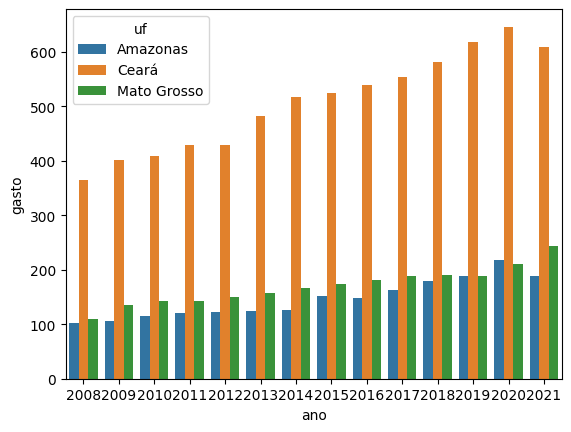

In [120]:
sns.barplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

<Axes: xlabel='ano', ylabel='gasto'>

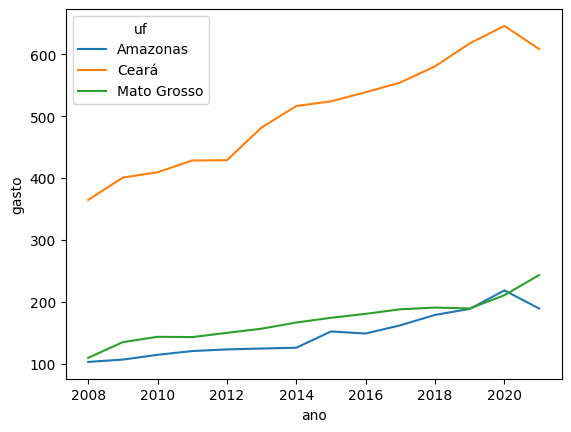

In [121]:
sns.lineplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

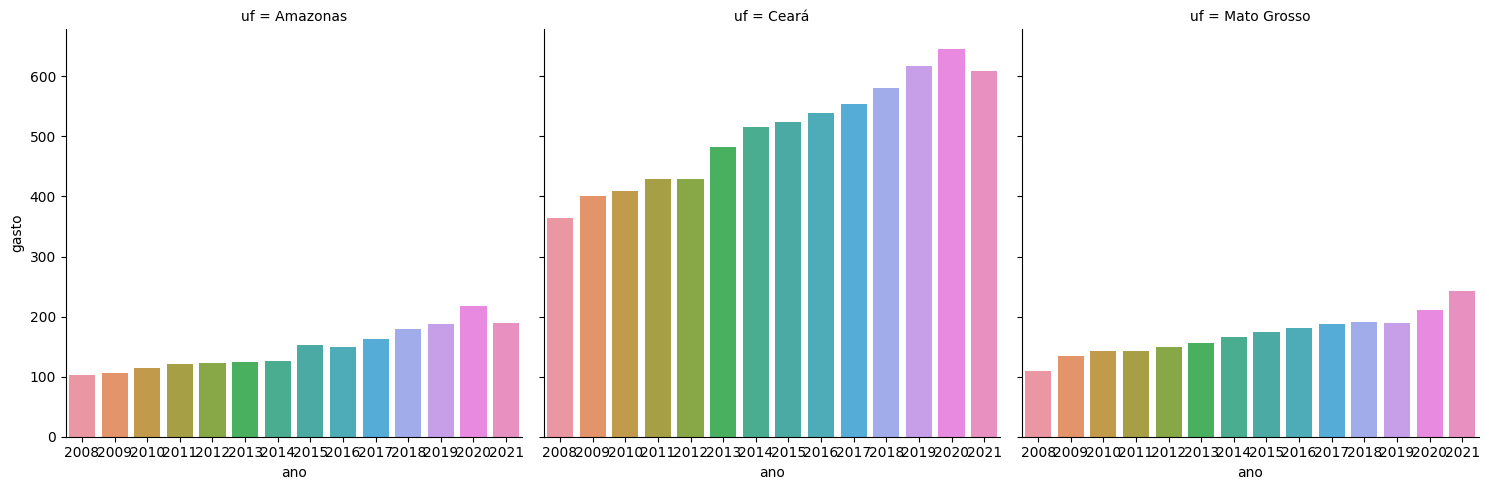

In [122]:
sns.catplot(data=por_ano_dos_estados, x="ano", y="gasto", col="uf", kind="bar")

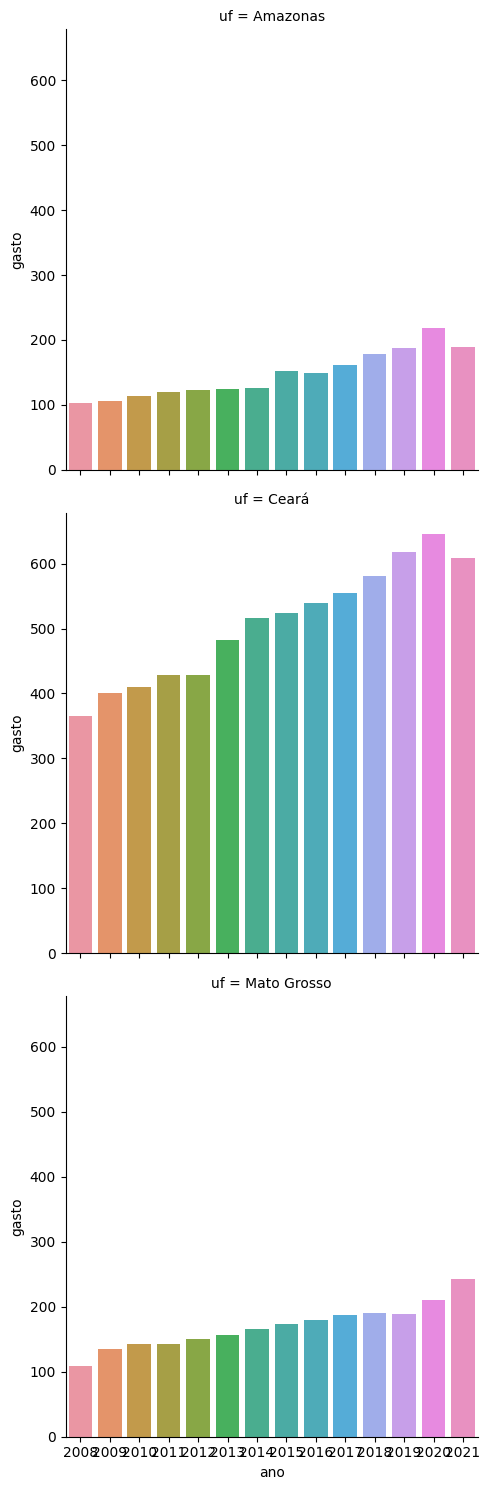

In [123]:
sns.catplot(data=por_ano_dos_estados, x="ano", y="gasto", row="uf", kind="bar")

# Desafio: refinar o penúltimo gráfico, onde usamos o `col`. Alterar o grid.

# Desafio: explorar a documentação da seaborn e matplotlib. Escolher um gráfico novo e plotar. Redondinho.

# Desafio: plotar 4 estados, 2 na linha de cima e 2 na linha de baixo.

In [ ]:
# # dados = pd.read_csv('../../dataset/Visualizacao Dados/A150850189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',', engine='python')
# dataset = pl.read_csv(
#     '../../Data/Visualizacao Dados/A150850189_28_143_208.csv',
#     separator=';',
#     encoding='ISO-8859-1',
#     skip_rows=3,
#     has_header= True).with_columns(pl.all().str.replace(",", ".")).with_columns(pl.all().str.replace("-", "NaN"))
# # C:\DS\Fiap\Data\auto-mpg-original.csv
# # dataset_pd = pd.read_csv('../../Data/Visualizacao Dados/winequality-red.csv', sep=';')
# dataset_pl = pl.read_csv('../../Data/Visualizacao Dados/winequality-red.csv', separator=';', ignore_errors=True)
# dataset_pl.head

In [ ]:
# # sql = pl.SQLContext()
# # sql.register("teste", dataset)# com lazy
# # resultado = sql.query(""" SELECT COUNT(DISTINCT origin) FROM teste; """)
# # resultado
# dataset.columns
# dataset_pl.shape
# dataset_pl.columns
# dataset_pd = pd.DataFrame(dataset_pl, columns=dataset_pl.columns)
# dataset_pd.head(5)

fast tast
- 1 read_excel
- 2 scatter
- 3 xticks
- 4 df[df.columns[-1]]
- 5 groupby